In [8]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

# Send a GET request to the API
url = "https://data.cityofnewyork.us/resource/vfnx-vebw.json"
response = requests.get(url)

# Convert the JSON response to a list of dictionaries
data = response.json()

# Extract the desired fields from the data
columns = ["unique_squirrel_id", "primary_fur_color", "age", "chasing", "climbing"]
extracted_data = []
for entry in data:
    extracted_entry = {}
    for col in columns:
        if col in entry:
            extracted_entry[col] = entry[col]
        else:
            extracted_entry[col] = None
    extracted_data.append(extracted_entry)

# Create a dataframe from the extracted data
df = pd.DataFrame(extracted_data)

# Print the dataframe
print(df)


    unique_squirrel_id primary_fur_color       age  chasing  climbing
0       37F-PM-1014-03              None      None    False     False
1       21B-AM-1019-04              None      None    False     False
2       11B-PM-1014-08              Gray      None     True     False
3       32E-PM-1017-14              Gray     Adult    False     False
4       13E-AM-1017-05              Gray     Adult    False     False
..                 ...               ...       ...      ...       ...
995     16D-AM-1007-01              Gray     Adult    False      True
996      3B-AM-1010-10          Cinnamon     Adult    False     False
997     33D-AM-1017-03              Gray     Adult    False     False
998      2A-PM-1019-04              Gray  Juvenile    False     False
999      2A-AM-1010-08              Gray     Adult    False     False

[1000 rows x 5 columns]


In [9]:
# Clean the dataframe by dropping rows with "None" values
df_cleaned = df.dropna()

# Reset the index of the cleaned dataframe
df_cleaned.reset_index(drop=True, inplace=True)

# Print the cleaned dataframe
print(df_cleaned)

    unique_squirrel_id primary_fur_color       age  chasing  climbing
0       32E-PM-1017-14              Gray     Adult    False     False
1       13E-AM-1017-05              Gray     Adult    False     False
2       11H-AM-1010-03          Cinnamon     Adult    False     False
3       36H-AM-1010-02              Gray     Adult    False     False
4       33F-AM-1008-02              Gray     Adult    False     False
..                 ...               ...       ...      ...       ...
934     16D-AM-1007-01              Gray     Adult    False      True
935      3B-AM-1010-10          Cinnamon     Adult    False     False
936     33D-AM-1017-03              Gray     Adult    False     False
937      2A-PM-1019-04              Gray  Juvenile    False     False
938      2A-AM-1010-08              Gray     Adult    False     False

[939 rows x 5 columns]


In [10]:
# Perform EDA
color_climbing_counts = df_cleaned.groupby(['primary_fur_color', 'climbing']).size().unstack()

In [11]:
color_climbing_counts

climbing,False,True
primary_fur_color,,
Black,19,12
Cinnamon,92,30
Gray,633,153


In [14]:
# Get unique counts for primary fur color
color_counts = df_cleaned['primary_fur_color'].value_counts()
color_counts

Gray        786
Cinnamon    122
Black        31
Name: primary_fur_color, dtype: int64

In [16]:
# Calculate the percentage of each fur color category based on climbing behavior
color_percentage = df_cleaned.groupby('primary_fur_color')['climbing'].value_counts(normalize=True) * 100
color_percentage

primary_fur_color  climbing
Black              False       61.290323
                   True        38.709677
Cinnamon           False       75.409836
                   True        24.590164
Gray               False       80.534351
                   True        19.465649
Name: climbing, dtype: float64

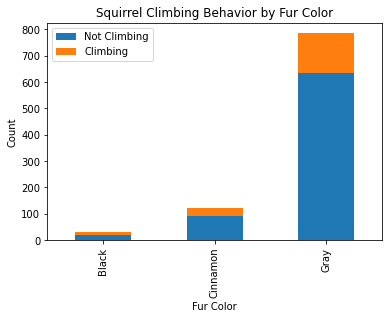

In [12]:
# Create a bar chart
color_climbing_counts.plot(kind='bar', stacked=True)
plt.xlabel('Fur Color')
plt.ylabel('Count')
plt.title('Squirrel Climbing Behavior by Fur Color')
plt.legend(['Not Climbing', 'Climbing'])
plt.show()